In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('E:\\python practice\\news.csv')

df.head(20)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [3]:
df.drop(columns=["Unnamed: 0","title"],axis=1,inplace=True)


In [4]:
df

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [5]:
X=df['text']
Y=df['label']

In [6]:
Y=pd.get_dummies(df["label"])
Y=Y.iloc[:,1].values
Y

array([0, 0, 1, ..., 0, 1, 1], dtype=uint8)

In [7]:
from nltk.corpus import stopwords   #remove stopwords
from nltk.stem.porter import PorterStemmer   #stemming
import re
from gensim.models import Word2Vec   # word2vec method

In [8]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    text = re.sub('[^-A-Za-z]', ' ', df['text'][i])
    text = text.lower()
    text = text.split()
    
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text) 


In [9]:
len(corpus),len(Y)

(6335, 6335)

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30)


In [11]:
len(xtrain),len(ytrain),len(xtest),len(ytest)

(4434, 4434, 1901, 1901)

In [12]:
%%time
documents=[text.split() for text in xtrain]
#print(documents)

Wall time: 609 ms


In [13]:
len(documents)

4434

In [14]:
import gensim
print(gensim.__version__)

w2v_model = gensim.models.Word2Vec(size=300,window=3, min_count=5,workers=8)
print(Word2Vec)

3.8.1
<class 'gensim.models.word2vec.Word2Vec'>


In [15]:
w2v_model

In [16]:
w2v_model.build_vocab(documents)
# Build vocabulary from a dictionary of word frequencies.


In [17]:
words = w2v_model.wv.vocab.keys()
print(words)
vocab_size = len(words)
print(vocab_size)

dict_keys(['The', 'debacle', 'in', 'Congress', 'last', 'week', 'over', 'President', 'Barack', "Obama's", 'trade', 'agenda', 'was', 'further', 'evidence', 'that', 'domestic', 'political', 'wrangling', 'is', 'harming', 'U.S.', 'leadership', 'the', 'global', 'economy.', 'By', 'failing', 'to', 'pass', 'Trade', 'Adjustment', 'which', 'provides', 'help', 'American', 'workers', 'affected', 'by', 'international', 'trade,', 'has', 'raised', 'doubts', 'about', 'ability', 'conclude', 'Trans-Pacific', 'Partnership,', 'an', 'agreement', 'with', '11', 'other', 'Pacific', 'economies.', 'It', 'also', 'prospects', 'for', 'negotiations', 'on', 'and', 'Investment', 'Partnership', 'Europe.', "wasn't", 'first', 'time', 'recently', 'sought', 'derail', 'executive', 'branch', 'had', 'successfully', 'advanced', 'abroad.', 'In', 'recent', 'months,', 'lawmakers', 'have', 'again', 'failed', 'approve', 'reforms', 'International', 'Monetary', 'Fund', 'were', 'crafted', 'administration,', 'approved', 'most', 'of', '

In [18]:
w2v_model.train(documents,total_examples=len(documents),epochs=32)

(82451790, 109882976)

In [19]:
w2v_model.most_similar("news")

C:\Users\Amjad Net Cafe\.conda\envs\myEnv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('press', 0.45009467005729675),
 ('news.', 0.3722531497478485),
 ('news,', 0.36406487226486206),
 ('cable', 0.3159641623497009),
 ('media', 0.300995409488678),
 ('television', 0.2943325340747833),
 ('newspaper', 0.2942245304584503),
 ('headlines', 0.28777313232421875),
 ('weekly', 0.27848806977272034),
 ('media.', 0.2774096727371216)]

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()


In [21]:
tokenizer.fit_on_texts(xtrain)
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 82129


In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(tokenizer.texts_to_sequences(xtrain), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(xtest), maxlen=300)

In [23]:
x_test

array([[    8,  3923,    19, ...,  1344,     4,  1407],
       [ 1213, 29270,     8, ...,     9,   104,   168],
       [   74,   260,   840, ...,     2,    19,   284],
       ...,
       [    0,     0,     0, ...,  4587,     2,   311],
       [  609,     3,     1, ...,    41,    61, 42402],
       [    0,     0,     0, ...,    28,  4121,   554]])

In [24]:
x_train

array([[   16,  4084,  1032, ..., 44425,  2636,  2180],
       [  287,     8,  1140, ...,    18,  1469,   541],
       [    0,     0,     0, ...,     9,     1, 18537],
       ...,
       [    0,     0,     0, ...,    15,  3170,   122],
       [ 5259,    20,    45, ...,     6,     1,   440],
       [    6,     5,   133, ...,   565,   904,   345]])

In [25]:
# Build Embedding Layer
embedding_matrix = np.zeros((vocab_size, 300))
print(embedding_matrix)
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(82129, 300)


In [26]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.19369398, -0.09107675, -0.01307879, ...,  0.69768876,
         0.37508833, -1.18452752],
       [ 0.60256398, -1.15225065,  0.77799457, ..., -0.39989915,
         0.36465883,  0.32533219],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [27]:
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
# Build The model
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [29]:
embedding_layer

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          24638700  
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                93440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 24,732,205
Trainable params: 93,505
Non-trainable params: 24,638,700
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [33]:
history = model.fit(x_train, ytrain,
                    batch_size=32,
                    epochs=8,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
125/125 [==============================] - 116s 925ms/step - loss: 0.5494 - accuracy: 0.7138 - val_loss: 0.4115 - val_accuracy: 0.8041
Epoch 2/8
125/125 [==============================] - 113s 906ms/step - loss: 0.4289 - accuracy: 0.7922 - val_loss: 0.3618 - val_accuracy: 0.8378
Epoch 3/8
125/125 [==============================] - 114s 909ms/step - loss: 0.3744 - accuracy: 0.8378 - val_loss: 0.3629 - val_accuracy: 0.8536
Epoch 4/8
125/125 [==============================] - 113s 906ms/step - loss: 0.3467 - accuracy: 0.8499 - val_loss: 0.3605 - val_accuracy: 0.8626
Epoch 5/8
125/125 [==============================] - 113s 904ms/step - loss: 0.2858 - accuracy: 0.8840 - val_loss: 0.5056 - val_accuracy: 0.8018
Epoch 6/8
125/125 [==============================] - 113s 905ms/step - loss: 0.2897 - accuracy: 0.8779 - val_loss: 0.3649 - val_accuracy: 0.8356
Epoch 7/8
125/125 [==============================] - 114s 909ms/step - loss: 0.2623 - accuracy: 0.8885 - val_loss: 0.3184 - val_ac

In [34]:
%%time
score = model.evaluate(x_test, ytest, batch_size=32)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

60/60 [==============================] - 7s 119ms/step - loss: 0.3378 - accuracy: 0.8759

ACCURACY: 0.8758547902107239
LOSS: 0.3377966284751892
Wall time: 7.37 s


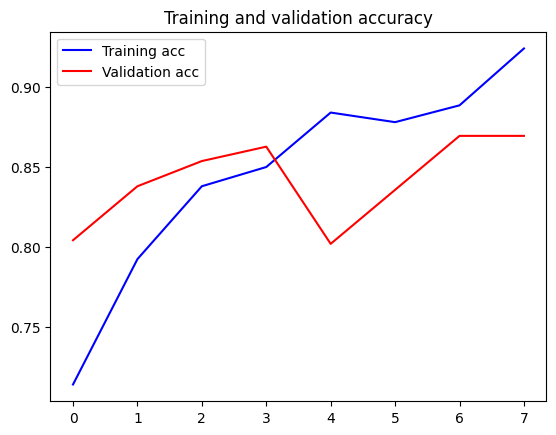

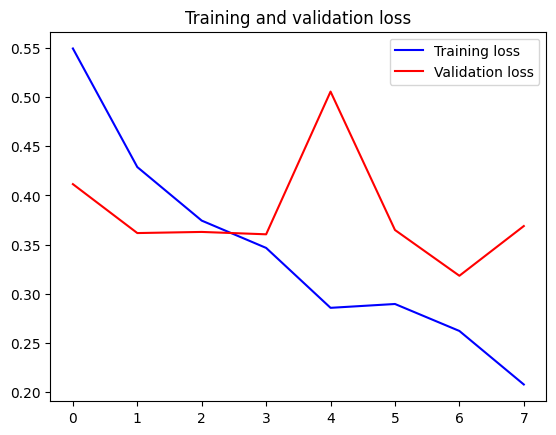

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()